# Component Retention Methods - MA2003B Multivariate Statistics Course

This notebook demonstrates three common methods for determining how many principal components to retain in PCA analysis. Component retention is crucial for balancing dimensionality reduction with information preservation.

## Learning Objectives:
- Apply Kaiser criterion (eigenvalues > 1.0)
- Use cumulative variance threshold (e.g., 80%)
- Interpret scree plots for the "elbow" point
- Understand trade-offs between different retention criteria

**Data**: Simulated 100 observations × 5 variables with random normal distribution

**Expected Output**:
- Scree plot visualization
- Component counts from different methods
- Cumulative variance percentages

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Generate Sample Data
# Using 5 variables to show clear component retention decisions
np.random.seed(42)
X = np.random.randn(100, 5)

In [3]:
# Display Dataset Information
print("Component Retention Analysis")
print("=" * 40)
print(f"Dataset: {X.shape[0]} observations × {X.shape[1]} variables")

Component Retention Analysis
Dataset: 100 observations × 5 variables


In [4]:
# Fit PCA to Extract All Components
pca = PCA()
pca.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [5]:
# Extract Eigenvalues and Cumulative Variance
eigenvalues = pca.explained_variance_
cumvar = pca.explained_variance_ratio_.cumsum()

In [6]:
# Display Eigenvalues and Cumulative Variance
print("Eigenvalues:", np.round(eigenvalues, 3))
print("Cumulative Variance Ratios:", np.round(cumvar, 3))

Eigenvalues: [1.265 1.04  0.974 0.874 0.666]
Cumulative Variance Ratios: [0.263 0.478 0.681 0.862 1.   ]


In [7]:
# Method 1: Kaiser Criterion
# Retain components with eigenvalues greater than 1.0
n_kaiser = sum(eigenvalues > 1)
print(f"Kaiser Criterion (eigenvalues > 1.0): Retain {n_kaiser} components")
print("Rationale: Components should explain more variance than individual variables")

Kaiser Criterion (eigenvalues > 1.0): Retain 2 components
Rationale: Components should explain more variance than individual variables


In [8]:
# Method 2: Cumulative Variance Threshold
# Retain enough components to explain 80% of total variance
variance_threshold = 0.8
n_cumvar = np.argmax(cumvar >= variance_threshold) + 1
print(
    f"Cumulative Variance Threshold ({variance_threshold*100:.0f}%): Retain {n_cumvar} components"
)
print("Rationale: Balance dimensionality reduction with information retention")

Cumulative Variance Threshold (80%): Retain 4 components
Rationale: Balance dimensionality reduction with information retention


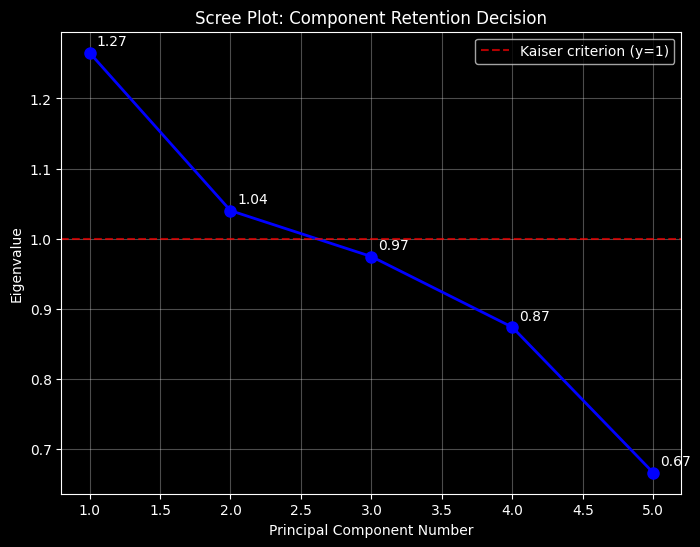

In [9]:
# Method 3: Scree Plot (Visual Inspection)
# Plot eigenvalues and look for "elbow" where slope changes dramatically
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, "bo-", linewidth=2, markersize=8)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7, label="Kaiser criterion (y=1)")
plt.title("Scree Plot: Component Retention Decision")
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalue")
plt.grid(True, alpha=0.3)
plt.legend()

# Add annotations for key points
for i, eigenval in enumerate(eigenvalues, 1):
    plt.annotate(
        f"{eigenval:.2f}",
        (i, eigenval),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

## Component Retention Summary

- **Kaiser Criterion**: Good default for most applications (retain eigenvalues > 1.0)
- **Cumulative Variance**: Application-specific thresholds (higher for prediction, lower for visualization)
- **Scree Plot**: Subjective but often most insightful - look for the "elbow" point
- **Consider**: Domain knowledge, practical constraints, and analysis objectives when choosing retention criteria